In [2]:
# some of the following libraries are obtained from the repository repos="http://R-Forge.R-project.org"
library("rJava")
library("Rwordseg")
library("tm")
library("tmcn")
library("wordcloud")
library("ggplot2")

# Version: 0.2-1
Loading required package: NLP
# tmcn Version: 0.1-4
Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



#### array and matrix:

In [18]:
vec=1:9 # construct an array 1,2,...,9

In [19]:
vec

[1] 1 2 3 4 5 6 7 8 9

In [20]:
vec[1:10]

[1]  1  2  3  4  5  6  7  8  9 NA

In [28]:
length(vec)
class(vec)

[1] 9

[1] "matrix"

In [39]:
dim(vec)=c(3,3)
vec
vec[,3] # third column
vec[3,] # third row
t(vec)  # transpose of the matrix
typeof(vec)
class(vec)
dim(vec)

x=vec
xt=t(vec)
x%*%xt # multiplication of two matrices

1,4,7
2,5,8
3,6,9


[1] 7 8 9

[1] 3 6 9

1,2,3
4,5,6
7,8,9


[1] "integer"

[1] "matrix"

[1] 3 3

66,78,90
78,93,108
90,108,126


#### data frame:

In [54]:
id=  c(1, 2, 3, 4)
age= c(25, 30, 35, 40)
gender= c("Male", "Male", "Female", "Female")
pay= c (30000, 40000, 45000, 50000)
df = data.frame(id, age, gender, pay)
df

class(df)
mode(df)

id,age,gender,pay
1,25,Male,30000
2,30,Male,40000
3,35,Female,45000
4,40,Female,50000


[1] "data.frame"

[1] "list"

#### list

In [55]:
mylist= list(123,name="Paul", wife="Iris", no.kids=3,
kids.age=c(25,28,30), df)

In [56]:
mylist

[[1]]
[1] 123

$name
[1] "Paul"

$wife
[1] "Iris"

$no.kids
[1] 3

$kids.age
[1] 25 28 30

[[6]]
  id age gender   pay
1  1  25   Male 30000
2  2  30   Male 40000
3  3  35 Female 45000
4  4  40 Female 50000


#### get data from a list:

In [64]:
mylist$kids.age[2]

[1] 28

In [68]:
mylist[[5]][2]

[1] 28

#### for, if and while:

In [72]:
for(x in 1:10){
    if(x==5) break
    print(x)
}

[1] 1
[1] 2
[1] 3
[1] 4


In [74]:
for(x in 1:10){
    if(x==5) next
    print(x)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [77]:
x=0
while(x<10){
    print(x)
    x=x+1
}

[1] 0
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9


In [80]:
function(x){}

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unerwartetes Symbol
1: function aaa
             ^


In [2]:
#dat = read.csv("cnyes_news_01102016_to_30112016.csv",header = TRUE)

In [3]:
dat = read.csv("BLACK-DECKER-CHV1410L-Lithium-Cordless-19122016.csv",header = FALSE)

In [4]:
dat=dat$V3
df=data.frame(dat)

In [5]:
class(dat)

[1] "factor"

In [6]:
class(df)

[1] "data.frame"

In [7]:
print(head(dat,2))

[1] I've owned some type of Dustbuster/handvac for the last twenty years and I don't think I've ever ever had one that I didn't hate.  Too little suction power, not enough charge time, the suction nozzle is awkward to use, and the batteries are always dead after a couple minutes. I can keep them plugged into the wall all the time, but that kills the battery and wastes electricity.  I have found it much more effective to just use the suction hose on my upright, even though that means lugging my vacuum around. So I decided to see what is new in handvac technology and if they have improved at all over the last ten years.  Fortunately, I can say that they have.The Black and Decker 14.4v Lithium Ion DustBuster is the same handvac as the Black & Decker CHV1410 Dustbuster 14.4-Volt Cordless Cyclonic Hand Vac except it contains a Lithium-Ion (LIB) battery, whereas the standard CHV1410 contains a nickel-cadmium (Ni-Cd) battery.  If you're trying to decide between the two devices, I would recomm

In [ ]:
dfs <- DataframeSource(df)

corpus = Corpus(dfs)
print(corpus)

tdm=TermDocumentMatrix(corpus)
#inspect(tdm)     # this matrix is too big. Don't inspect it.
#typeof(corpus)
#class(corpus)
#inspect(corpus)
#dtm = DocumentTermMatrix(corpus, 
#                         control = list(weighting = weightTfIdf, stopwords = TRUE, 
#                                        removePunctuation = TRUE, stemming = TRUE)) 

#m <- as.matrix(dtm)   
#dim(m)   
#write.csv(m, file="a.csv")

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 9362


In [46]:
n= c(2,3,5)
s=c("aa","bb","cc")
df=data.frame(n,s)

In [47]:
df
typeof(df)

n,s
2,aa
3,bb
5,cc


[1] "list"

In [36]:
df=data.frame(dat[1],dat[2],dat[3])
typeof(df)

[1] "list"

In [35]:
head(df,3)

date,title,news.content
2016/11/30 19:40,單月落跑150億！德銀：明年亞洲恐面臨美元荒,德意志銀行 (Deutsche Bank) 警告，在總體經濟與市場雙重力量醞釀的「完美風暴」下，明年亞洲市場恐將面臨美元短缺窘境。主要由於川普 (Donald Trump) 當選美國總統後，美國利率及經濟看升，牽動美元投資資金大量撤出亞洲，而美國貿易部位也預期縮小，此外美國企業可能將海外資金匯回國內。德銀策略師 Mallika Sachdeva 的團隊周一 (28 日) 發布報告指出，受到月初川普勝選刺激，本月份已有 150 億美元資金撤出亞洲股債市，接近今年流入該區資金的 30%。因美元強升，加上川普的保護主義政策主張，使得新興市場經濟成長展望蒙上陰影。德銀並預警，未來幾年，美國與亞洲間的貿易部位恐將更緊縮，導致漂流海外的美元資金池縮小，造成新興市場國家進行跨境貿易結算及償還強勢貨幣債務時，困難度更高。Sachdeva 等人寫道，無論是貿易、投資組合及收購債券等亞洲國家美元來源，在川普當選後都面臨縮減的風險。亞洲出口恐怕將因美國保護主義政策而受傷，造成貿易出超縮減。儘管反映亞洲取得美元成本的交叉貨幣基準交換價差 (cross-currency basis swap spread)，今年大致持穩，因亞洲國家經常帳盈餘已大增，且外資積極流入，加上亞洲保險商將海外發行債券的收益換為當地貨幣，使得亞洲的美元供應充沛。但德銀警告，明年情況可能無法如此安逸，尤其是過去一個月，在菲律賓、南韓、馬來西亞及特別是印度的融資市場，已冒出美元籌資承壓的證據。亞洲美元荒的另一個可能原因，是如果川普遵守競選承諾，改革美國企業稅規，美國企業或許會將放在亞洲市場的龐大獲利移回國內。德銀算出，這類資金單單在新加坡就有 1000 億美元，凸顯星國身為全球資金存放庫的地位。總體而言，從數個技術性指標來看──包括企業及銀行業短期融資價差、交叉貨幣基準交換價差及即將到期的境內遠期貨幣市場，明年亞洲美元流動性將面臨更艱難的挑戰，即使外國市場仍對來自亞洲的債券發行抱持歡迎。
2016/11/30 16:04,新台幣兌美元周三(30日)收盤報31.890元 貶值7.2分,新台幣兌美元周三 (30 日) 收盤報 31.890 元，貶值 7.2 分，成交量 9.59 億美元。開盤價為 31.820 元，最高 31.788 元，最低 31.909 元。
2016/11/30 14:35,英國央行新版5鎊鈔票 素食者不敢使用？,據《衛報》報導，英國近日為新發行 5 英鎊鈔票爭吵不休，由於鈔票製作過程使用動物脂肪，當地素食者因此呼籲變更該塑料鈔票的生產過程。要求鈔票停止使用牛脂的請願活動已展開，目前為止已吸引超過 7 萬名支持者響應，該請願書將送達至英國央行 (Bank of England) 。請願書內提到，「新版 5 英鎊鈔票含有動物脂肪，這對英國數百萬純素及素食者來說是不容接受的。我們要求您停止在我們必須使用的貨幣生產過程中使用動物製品。」英國央行拒絕對請願進行回應，一位發言人表示，問題在於 5 英鎊鈔票上印的有機聚合物含有牛脂。英國央行生產鈔票的聚合物基底，是向外部公司 Innovia Security 購買，該公司主要供應 24 個國家 80 種不同鈔票的基底材質。此事於推特上引發熱議，許多網友為素食者及一些宗教團體發聲。新版 5 英鎊鈔票於今年 9 月開始流通，且材質較紙鈔更為堅硬 ── 即使遭紅酒浸濕或在洗衣機運轉仍能存活。不過，新版鈔票會在超過攝氏 120 度情況下縮小融化，因此熨斗可能使之受損。新版 5 英鎊鈔票很難被撕毀，但若上頭有刻痕則容易被撕裂。繼在推特上證實新版鈔票的確含有牛脂，英國央行同時承認全新塑料鈔票有時容易黏在一塊兒。事實上，塑膠鈔票被使用於其他許多國家，有些國家甚至已將流通鈔票全轉換為塑料鈔票，例如澳洲、加拿大、羅馬尼亞及越南。


In [9]:
print(head(dat$title,20))

 [1] 單月落跑150億！德銀：明年亞洲恐面臨美元荒        
 [2] 新台幣兌美元周三(30日)收盤報31.890元 貶值7.2分   
 [3] 英國央行新版5鎊鈔票 素食者不敢使用？             
 [4] 德銀：人民幣將再貶17%！因中國經濟靠房市泡沫      
 [5] 資金外逃勢難擋！川普若挑釁 人民幣明年自由浮動？  
 [6] 新台幣兌美元周三(30日)午盤報31.897元 貶7.9分     
 [7] 《人幣匯率》中間價30日報6.8865元 升值24基點      
 [8] 人民幣中間價報6.8865 升值24點 連漲三日           
 [9] 紐約匯市─美元上漲至接近數年高點後 回檔走低       
[10] 委內瑞拉貨幣 又成了自由落體 單單11月 再大跌55%   
[11] 委內瑞拉幣單月暴貶60%！竊賊改帶信用卡機盜刷      
[12] 誰該閉嘴？伯南克：Fed官員應避免公開預測央行行動  
[13] 新台幣由升轉貶，收31.818元、貶值1.6分            
[14] 日元大貶的背景主因：「美、日利差」快速擴大       
[15] 日元低不久！瑞銀：「川普泡沫」一旦破裂 日元飆回98
[16] 新台幣兌美元周二(29日)收盤報31.818元 貶1.6分     
[17] 澳元「極度高估」？德銀：3大理由繼續看貶澳元！    
[18] 新台幣兌美元匯價中午暫收31.791元，升值1.1分      
[19] 《人幣匯率》中間價29日報6.8889元 升值153基點     
[20] 人民幣中間價大幅上調153點 報6.8889               
1913 Levels: [賽事速遞] 前三甲差距甚微 最後一周究竟鹿死誰手？ ...


In [12]:
print(head(dat$V3))

[1] I've owned some type of Dustbuster/handvac for the last twenty years and I don't think I've ever ever had one that I didn't hate.  Too little suction power, not enough charge time, the suction nozzle is awkward to use, and the batteries are always dead after a couple minutes. I can keep them plugged into the wall all the time, but that kills the battery and wastes electricity.  I have found it much more effective to just use the suction hose on my upright, even though that means lugging my vacuum around. So I decided to see what is new in handvac technology and if they have improved at all over the last ten years.  Fortunately, I can say that they have.The Black and Decker 14.4v Lithium Ion DustBuster is the same handvac as the Black & Decker CHV1410 Dustbuster 14.4-Volt Cordless Cyclonic Hand Vac except it contains a Lithium-Ion (LIB) battery, whereas the standard CHV1410 contains a nickel-cadmium (Ni-Cd) battery.  If you're trying to decide between the two devices, I would recomm

In [3]:
data=read.csv(url("http://stat.columbia.edu/~rachel/datasets/nyt1.csv"))

In [4]:
head(data,5)

Age,Gender,Impressions,Clicks,Signed_In
36,0,3,0,1
73,1,3,0,1
30,0,3,0,1
49,1,3,0,1
47,1,11,0,1


In [5]:
data$agecat=cut(data$Age, c(-Inf,0,18,24,34,44,54,64,Inf))

In [6]:
cut(3,c(-1,2,5,6))

[1] (2,5]
Levels: (-1,2] (2,5] (5,6]

In [7]:
head(data,5)

Age,Gender,Impressions,Clicks,Signed_In,agecat
36,0,3,0,1,"(34,44]"
73,1,3,0,1,"(64, Inf]"
30,0,3,0,1,"(24,34]"
49,1,3,0,1,"(44,54]"
47,1,11,0,1,"(44,54]"


In [8]:
summary(data)

      Age             Gender       Impressions         Clicks       
 Min.   :  0.00   Min.   :0.000   Min.   : 0.000   Min.   :0.00000  
 1st Qu.:  0.00   1st Qu.:0.000   1st Qu.: 3.000   1st Qu.:0.00000  
 Median : 31.00   Median :0.000   Median : 5.000   Median :0.00000  
 Mean   : 29.48   Mean   :0.367   Mean   : 5.007   Mean   :0.09259  
 3rd Qu.: 48.00   3rd Qu.:1.000   3rd Qu.: 6.000   3rd Qu.:0.00000  
 Max.   :108.00   Max.   :1.000   Max.   :20.000   Max.   :4.00000  
                                                                    
   Signed_In           agecat      
 Min.   :0.0000   (-Inf,0]:137106  
 1st Qu.:0.0000   (34,44] : 70860  
 Median :1.0000   (44,54] : 64288  
 Mean   :0.7009   (24,34] : 58174  
 3rd Qu.:1.0000   (54,64] : 44738  
 Max.   :1.0000   (18,24] : 35270  
                  (Other) : 48005  

http://people.math.aau.dk/~sorenh/software/doBy/

In [9]:
library ( "doBy" )

In [10]:
siterange <- function ( x ){ c ( length ( x ), min ( x ), mean ( x ), max ( x ))} 
summaryBy ( Age ~ agecat , data = data , FUN = siterange )

agecat,Age.FUN1,Age.FUN2,Age.FUN3,Age.FUN4
"(-Inf,0]",137106,0,0.00000,0
"(0,18]",19252,7,16.03350,18
"(18,24]",35270,19,21.26904,24
"(24,34]",58174,25,29.50335,34
"(34,44]",70860,35,39.49468,44
"(44,54]",64288,45,49.49258,54
"(54,64]",44738,55,59.49819,64
"(64, Inf]",28753,65,72.98870,108


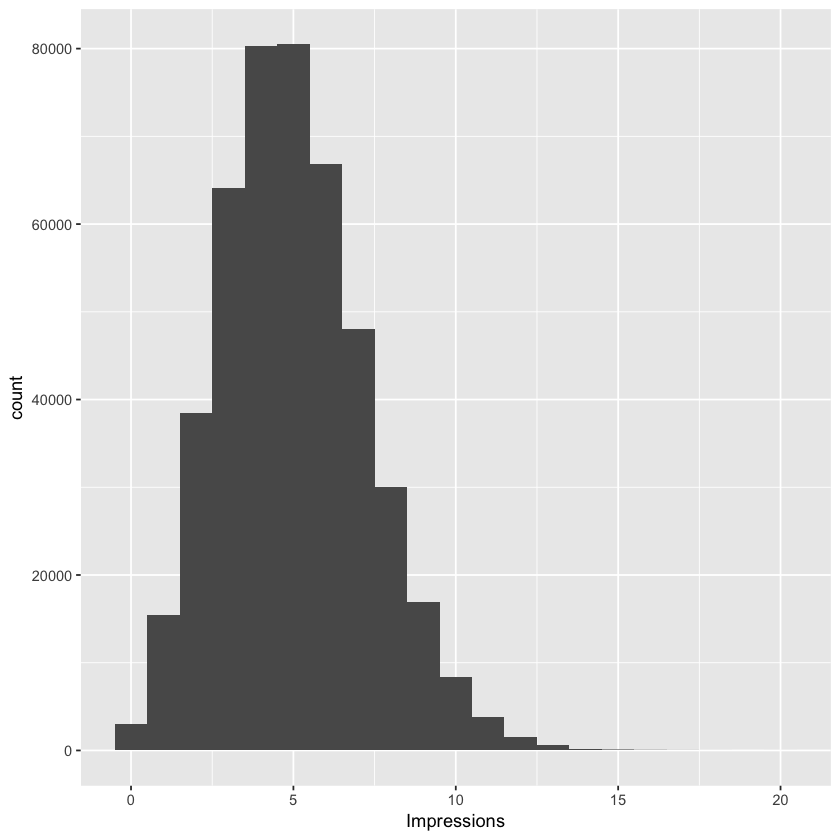

In [11]:
ggplot ( data , aes ( x = Impressions )) + geom_histogram ( binwidth = 1 ) 
#ggplot ( data , aes ( x = agecat , y = Impressions , fill = agecat )) + geom_boxplot ()

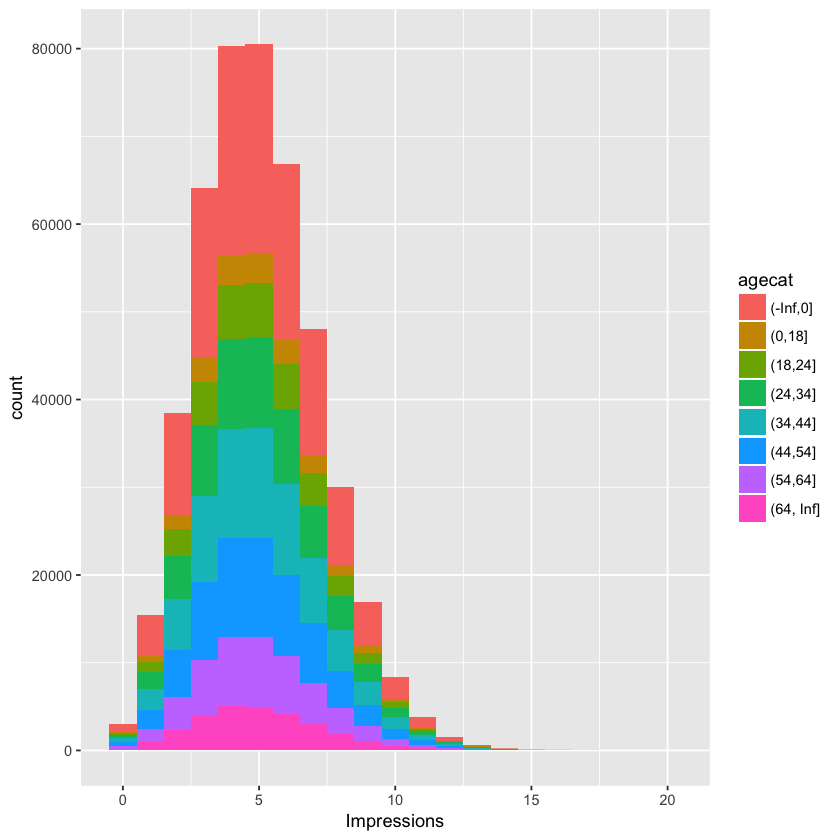

In [12]:
ggplot ( data , aes ( x = Impressions,fill=agecat  )) + geom_histogram ( binwidth = 1 ) 

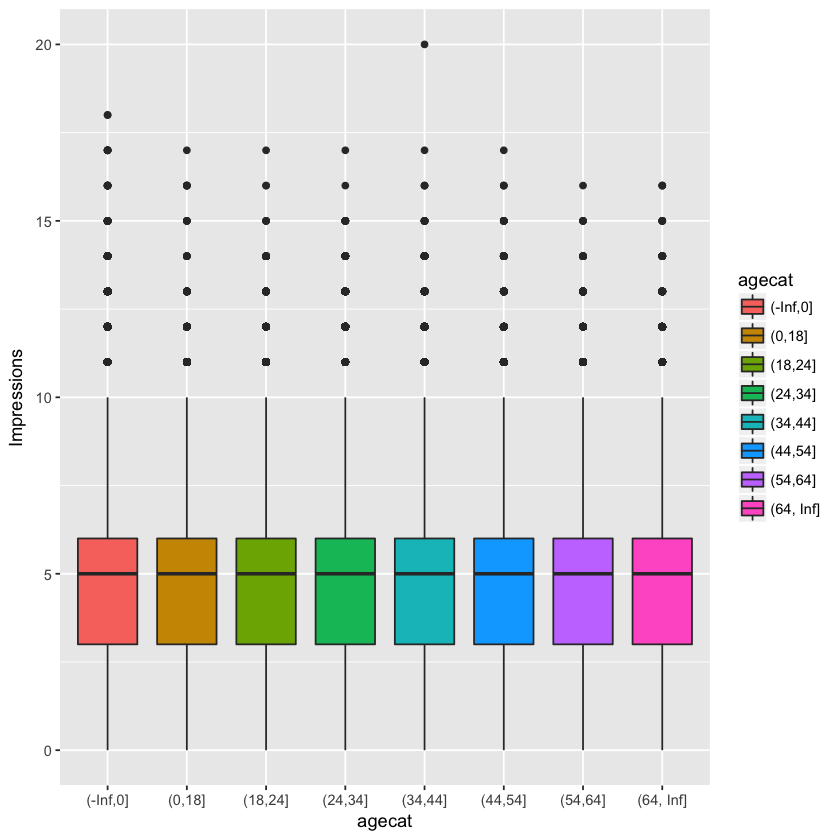

In [13]:
ggplot ( data , aes ( x = agecat , y = Impressions , fill = agecat )) + geom_boxplot ()

In [16]:
# we don't care about clicks if there are no impressions
data $ hasimps <- cut ( data $ Impressions , c ( - Inf , 0 , Inf )) 
summaryBy ( Clicks ~ hasimps , data = data , FUN = siterange ) 

hasimps,Clicks.FUN1,Clicks.FUN2,Clicks.FUN3,Clicks.FUN4
"(-Inf,0]",3066,0,0.00000000,0
"(0, Inf]",455375,0,0.09321768,4


In [18]:
head(subset ( data , Impressions > 0 ),5)

Age,Gender,Impressions,Clicks,Signed_In,agecat,hasimps
36,0,3,0,1,"(34,44]","(0, Inf]"
73,1,3,0,1,"(64, Inf]","(0, Inf]"
30,0,3,0,1,"(24,34]","(0, Inf]"
49,1,3,0,1,"(44,54]","(0, Inf]"
47,1,11,0,1,"(44,54]","(0, Inf]"


In [61]:
head(data$Clicks,30)

[1] 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [33]:
class(data)
dat=as.data.frame(data)
class(dat)

[1] "data.frame"

[1] "data.frame"

In [34]:
head(data$Clicks/data$Impressions,20)

[1] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.09090909
 [7] 0.14285714 0.00000000 0.00000000 0.00000000 0.12500000 0.00000000
[13] 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
[19] 0.00000000 0.00000000

In [35]:
length(data$Clicks)

[1] 458441

In [58]:
length(data$Clicks)

[1] 458441

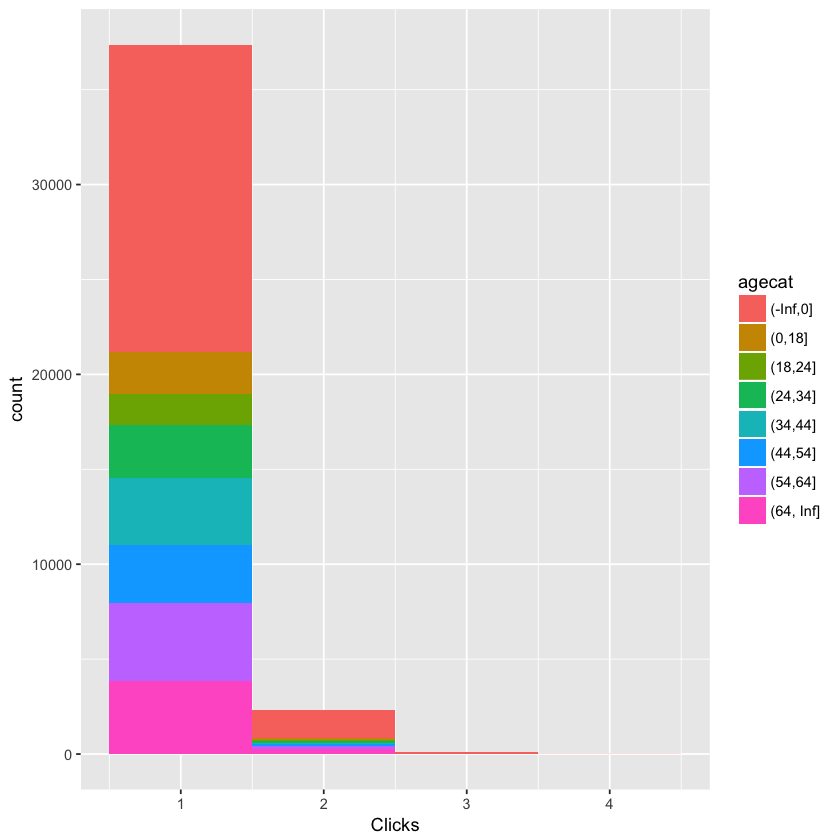

In [56]:
ggplot ( subset ( data , Clicks > 0 ), aes ( x = Clicks , fill = agecat )) +  geom_histogram ( binwidth = 1 ) 

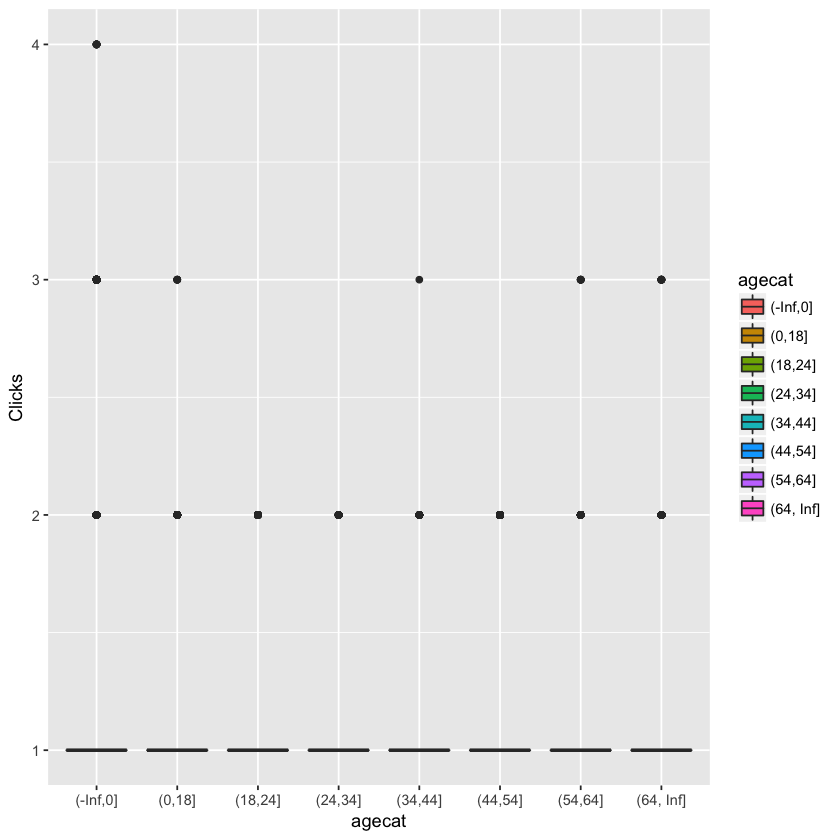

In [60]:
ggplot ( subset ( data , Clicks > 0 ), aes ( x = agecat , y = Clicks , fill = agecat )) + geom_boxplot () 

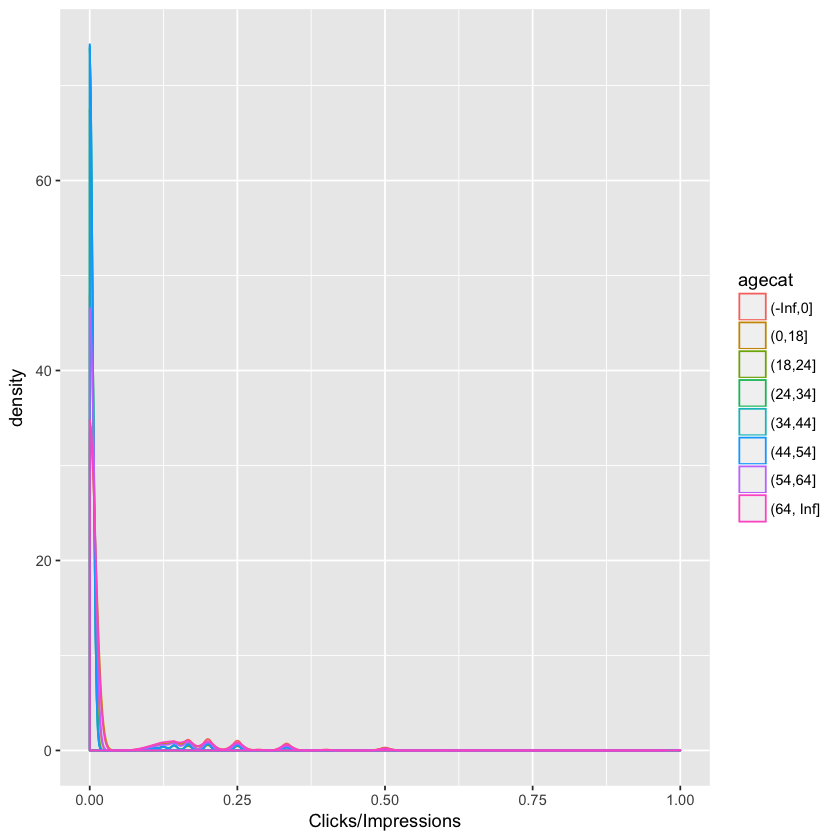

In [62]:
ggplot ( subset ( data , Impressions > 0 ), aes ( x = Clicks / Impressions , colour = agecat )) + geom_density () 

Warning message:
“Removed 1468 rows containing non-finite values (stat_density).”

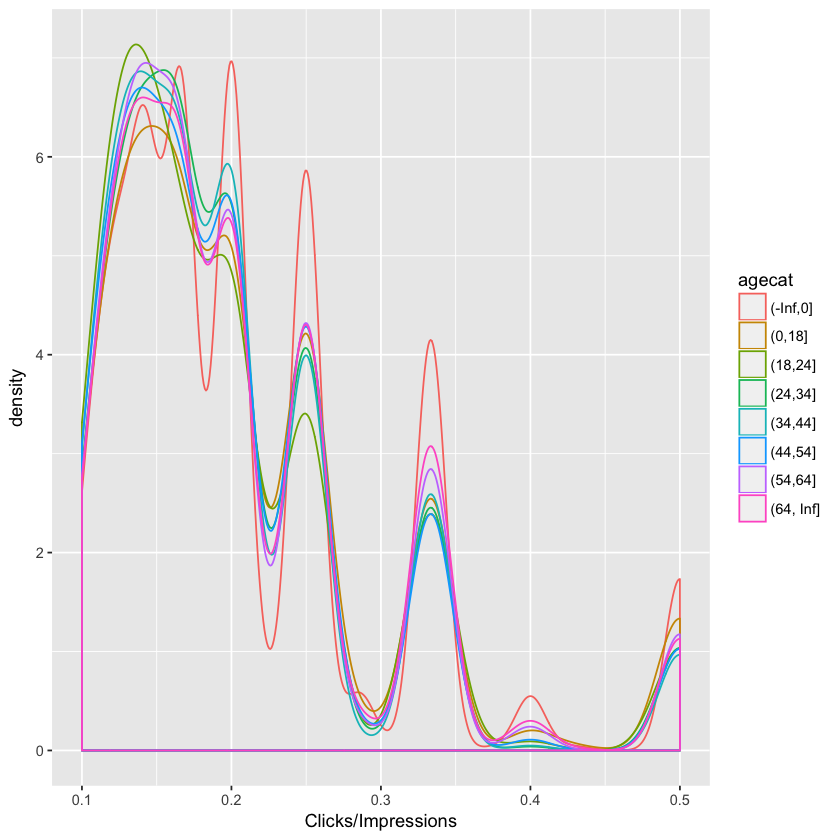

In [70]:
ggplot ( subset ( data , Clicks > 0 ), aes ( x = Clicks / Impressions , colour = agecat )) + geom_density ()+ xlim(0.1,0.5)

----

## 19012017

#### as.factor: change the type of the variable to "class"

In [1]:
library(class)

In [ ]:
norm=function(x){}